# Elastic Net linear regression example

**Example using the elastic linear regression function in the PyMLR module**

The **elastic** function provides output of the fitted regression model and summary statistics using the following method:

- ElasticNetCV: Elastic Net regression using Cross-Validation with iterative fitting along a regularization path 

The **elastic** function preprocesses X by default to standardize continuous features and one-hot encode categorical features.

This example shows how to cross-validate the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes dataset described by sklearn

Before running this notebook, first install the PyMLR module in your environment, if it is not already installed, using the following line in the next cell:

In [1]:
# !pip install git+https://github.com/gjpelletier/PyMLR.git --upgrade

## Read X and y from the sklearn diabetes data set

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting Elastic Net regression model, please wait ...

ElasticNetCV regression statistics of best model in model_outputs['stats']:

| Statistic          |    ElasticNetCV |
|:-------------------|----------------:|
| alpha              |     0.110002    |
| r-squared          |     0.527027    |
| adjusted r-squared |     0.51177     |
| n_samples          |   353           |
| df residuals       |   342           |
| df model           |    10           |
| F-statistic        |    38.1086      |
| Prob (F-statistic) |     1.11022e-16 |
| RMSE               |    53.6094      |
| Log-Likelihood     | -1906.43        |
| AIC                |  3834.87        |
| BIC                |  3877.4         |
| L1-ratio           |     0.99        |

Done
Time elapsed: 7.74 sec



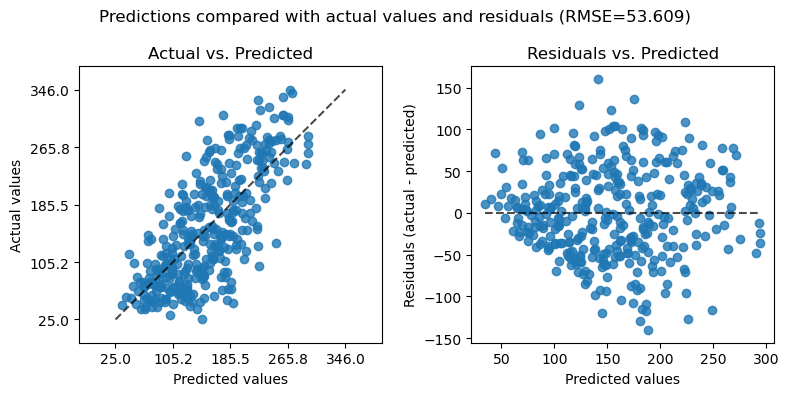

In [4]:
from PyMLR import elastic
train_model, train_output = elastic(X_train, y_train, verbose=1)

## Test the model with the testing data subset

In the next step we will check how well the predictions from fitted model match samples from the testing data. To standardize the testing data we will use the same preprocess_result scaler that was used to standardize the training data to avoid data leakage between the training and testing data.


Goodness of fit to testing data in result['metrics']:

| Statistic          |   Regressor |
|:-------------------|------------:|
| R-squared          |    0.455818 |
| MSE                | 2883.16     |
| RMSE               |   53.6951   |
| Explained Variance |    0.458758 |
| MAE                |   42.825    |
| Max Error          |  152.702    |
| MAPE               |    0.374203 |
| MSLE               |    0.173656 |
| n_samples          |   89        |



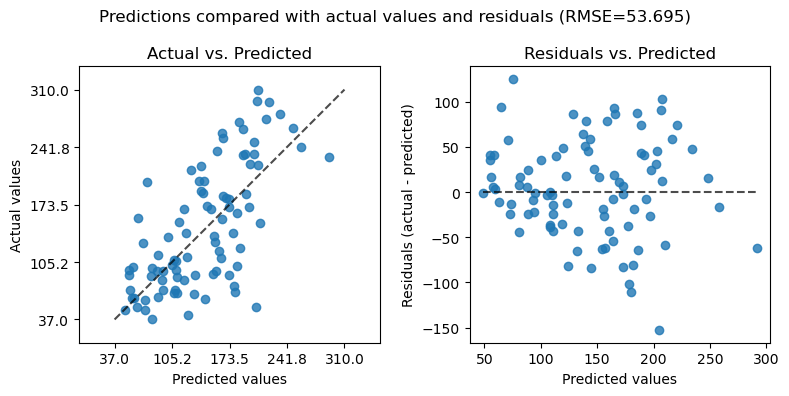

In [5]:
from PyMLR import test_model
test_output = test_model(train_model['ElasticNetCV'], X_test, y_test, 
    preprocess_result= train_output['preprocess_result'])

# save the plot of predictions vs actual and residuals
test_output['fig'].savefig("ElasticNetCV_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

In the next step we will fit the model using all of the X and y data. The standard scaler and encoder are recalculated by default (the user also has the option to input a previously calculated scaler/encoder from a previous preprocess_result).

Fitting Elastic Net regression model, please wait ...

ElasticNetCV regression statistics of best model in model_outputs['stats']:

| Statistic          |    ElasticNetCV |
|:-------------------|----------------:|
| alpha              |     0.389688    |
| r-squared          |     0.514457    |
| adjusted r-squared |     0.503191    |
| n_samples          |   442           |
| df residuals       |   432           |
| df model           |     9           |
| F-statistic        |    50.8583      |
| Prob (F-statistic) |     1.11022e-16 |
| RMSE               |    53.6583      |
| Log-Likelihood     | -2387.5         |
| AIC                |  4794.99        |
| BIC                |  4835.91        |
| L1-ratio           |     0.94        |

Done
Time elapsed: 7.80 sec



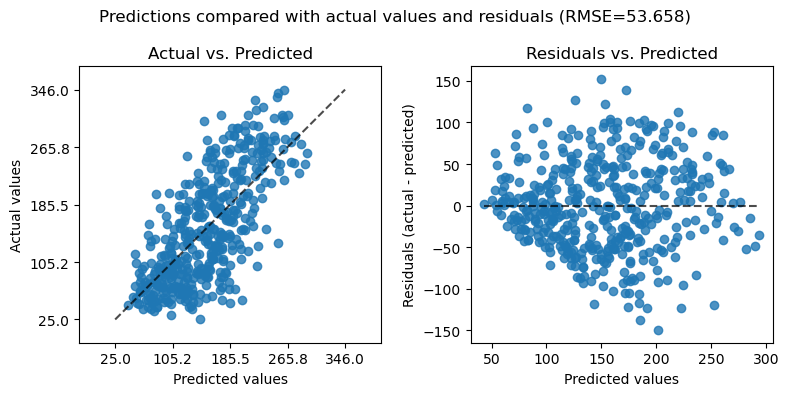

In [6]:
from PyMLR import elastic
final_model, final_output = elastic(X, y, verbose=1)

## User instructions

In [15]:
help(elastic)

Help on function elastic in module PyMLR:

elastic(X, y, **kwargs)
    Python function for ElasticNetCV linear regression

    by
    Greg Pelletier
    gjpelletier@gmail.com
    29-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        nfolds= number of folds to use for cross-validation (CV)
            (default nfolds=20)
        preprocess= True,           # Apply OneHotEncoder and StandardScaler
        preprocess_result= None,    # dict of the following result from
                                    # preprocess_train if available:
                                    # - encoder          (OneHotEncoder)
                                    # - scaler           (StandardScaler)
         